In [3]:
# Import pandas modules
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt    
    

In [4]:
# Isolate data items
# Date Range B: Shutdown Operating Period 22nd Dec 2018 - 25th Jan 2019
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL', 'MCO']
Date_Range_B_Dates = ['20181222', '20181223', '20181224', '20181225','20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]


Flight Counter: 1
Airline Flight#: DL365
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T12:20:00.000
Actual Departure: 2018-12-22T16:37:00.000
Flight Departure Delayed by (H:M:S): 4:17:00
Departure Time Delta (minutes): 257.0


Flight Counter: 2
Airline Flight#: DL897
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T12:55:00.000
Actual Departure: 2018-12-22T12:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 3
Airline Flight#: DL1701
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T13:40:00.000
Actual Departure: 2018-12-22T13:53:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 4
Airline Flight#: DL1586
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T13:45:00.000
Actual Departure: 2018-12-22T14:42:00.000
Flight Departure Delayed by (H:M:S): 0:57:00
Departure Time Delta (minutes): 57.0


Flight Counter: 5
Airline Flight

Flight Counter: 47
Airline Flight#: DL2807
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:57:00.000
Actual Departure: 2018-12-22T15:06:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 48
Airline Flight#: DL1804
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:58:00.000
Actual Departure: 2018-12-22T15:25:00.000
Flight Departure Delayed by (H:M:S): 0:27:00
Departure Time Delta (minutes): 27.0


Flight Counter: 49
Airline Flight#: DL1840
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:58:00.000
Actual Departure: 2018-12-22T15:39:00.000
Flight Departure Delayed by (H:M:S): 0:41:00
Departure Time Delta (minutes): 41.0


Flight Counter: 50
Airline Flight#: DL1524
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:59:00.000
Actual Departure: 2018-12-22T15:08:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 51
Airline


Flight Counter: 90
Airline Flight#: DL1459
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:50:00.000
Actual Departure: 2018-12-22T15:58:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 91
Airline Flight#: DL1814
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:53:00.000
Actual Departure: 2018-12-22T16:11:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 92
Airline Flight#: DL1264
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:54:00.000
Actual Departure: 2018-12-22T16:24:00.000
Flight Departure Delayed by (H:M:S): 0:30:00
Departure Time Delta (minutes): 30.0


Flight Counter: 93
Airline Flight#: DL186
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:55:00.000
Actual Departure: 2018-12-22T16:00:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 94
Airline

Scheduled Departure: 2018-12-22T17:50:00.000
Actual Departure: 2018-12-22T17:50:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 164
Airline Flight#: DL14
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T17:50:00.000
Actual Departure: 2018-12-22T18:11:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 165
Airline Flight#: DL337
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T17:52:00.000
Actual Departure: 2018-12-22T18:22:00.000
Flight Departure Delayed by (H:M:S): 0:30:00
Departure Time Delta (minutes): 30.0


Flight Counter: 166
Airline Flight#: DL2638
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T17:54:00.000
Actual Departure: 2018-12-22T17:52:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 167
Airline Flight#: DL2553
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T17:54:00.000
Actu

Flight Counter: 215
Airline Flight#: DL769
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:07:00.000
Actual Departure: 2018-12-22T19:31:00.000
Flight Departure Delayed by (H:M:S): 0:24:00
Departure Time Delta (minutes): 24.0


Flight Counter: 216
Airline Flight#: DL1454
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:07:00.000
Actual Departure: 2018-12-22T19:04:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 217
Airline Flight#: DL2327
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:11:00.000
Actual Departure: 2018-12-22T19:13:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 218
Airline Flight#: DL692
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:12:00.000
Actual Departure: 2018-12-22T20:14:00.000
Flight Departure Delayed by (H:M:S): 1:02:00
Departure Time Delta (minutes): 62.0


Flight Counter: 219
Airlin

Scheduled Departure: 2018-12-23T13:51:00.000
Actual Departure: 2018-12-23T13:51:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 275
Airline Flight#: DL1820
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T13:51:00.000
Actual Departure: 2018-12-23T13:49:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 276
Airline Flight#: DL1265
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T13:52:00.000
Actual Departure: 2018-12-23T13:50:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 277
Airline Flight#: DL1999
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T13:52:00.000
Actual Departure: 2018-12-23T14:01:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 278
Airline Flight#: DL2482
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T13:53:00.000
Actua

Scheduled Departure: 2018-12-23T15:00:00.000
Actual Departure: 2018-12-23T16:06:00.000
Flight Departure Delayed by (H:M:S): 1:06:00
Departure Time Delta (minutes): 66.0


Flight Counter: 325
Airline Flight#: DL2514
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:01:00.000
Actual Departure: 2018-12-23T15:00:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 326
Airline Flight#: DL2398
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:02:00.000
Actual Departure: 2018-12-23T14:59:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 327
Airline Flight#: DL1432
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:03:00.000
Actual Departure: 2018-12-23T15:00:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 328
Airline Flight#: DL1661
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-

Flight Counter: 359
Airline Flight#: DL1498
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:40:00.000
Actual Departure: 2018-12-23T15:40:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 360
Airline Flight#: DL885
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:40:00.000
Actual Departure: 2018-12-23T15:37:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 361
Airline Flight#: DL2457
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:45:00.000
Actual Departure: 2018-12-23T15:43:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 362
Airline Flight#: DL1264
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:50:00.000
Actual Departure: 2018-12-23T15:48:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 363
Airline Flight#: DL2198
Airport: 

Flight Counter: 420
Airline Flight#: DL1475
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:13:00.000
Actual Departure: 2018-12-23T17:21:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 421
Airline Flight#: DL2334
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:14:00.000
Actual Departure: 2018-12-23T17:12:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 422
Airline Flight#: DL381
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:24:00.000
Actual Departure: 2018-12-23T17:22:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 423
Airline Flight#: DL1685
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:29:00.000
Actual Departure: 2018-12-23T17:23:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 424
Airline Fli

Actual Departure: 2018-12-23T18:34:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 480
Airline Flight#: DL1636
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T18:38:00.000
Actual Departure: 2018-12-23T18:46:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 481
Airline Flight#: DL909
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T18:40:00.000
Actual Departure: 2018-12-23T18:40:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 482
Airline Flight#: DL1385
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T18:46:00.000
Actual Departure: 2018-12-23T18:41:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 483
Airline Flight#: DL887
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T18:49:00.000
Actual Departure: 2018-12-23T18:46:00.000
Flight D

Flight Counter: 545
Airline Flight#: DL1758
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T13:17:00.000
Actual Departure: 2018-12-24T13:43:00.000
Flight Departure Delayed by (H:M:S): 0:26:00
Departure Time Delta (minutes): 26.0


Flight Counter: 546
Airline Flight#: DL1403
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T13:40:00.000
Actual Departure: 2018-12-24T14:14:00.000
Flight Departure Delayed by (H:M:S): 0:34:00
Departure Time Delta (minutes): 34.0


Flight Counter: 547
Airline Flight#: DL185
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T13:45:00.000
Actual Departure: 2018-12-24T13:42:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 548
Airline Flight#: DL2270
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T13:48:00.000
Actual Departure: 2018-12-24T13:46:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 549
Airline

Flight Counter: 589
Airline Flight#: DL1661
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:03:00.000
Actual Departure: 2018-12-24T14:58:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 590
Airline Flight#: DL1381
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:05:00.000
Actual Departure: 2018-12-24T15:03:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 591
Airline Flight#: DL1992
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:05:00.000
Actual Departure: 2018-12-24T15:09:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 592
Airline Flight#: DL1615
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:05:00.000
Actual Departure: 2018-12-24T15:03:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 593
Airline Fl

Flight Counter: 629
Airline Flight#: DL2081
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T16:31:00.000
Actual Departure: 2018-12-24T16:30:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 630
Airline Flight#: DL1964
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T16:32:00.000
Actual Departure: 2018-12-24T16:29:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 631
Airline Flight#: DL1663
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T16:34:00.000
Actual Departure: 2018-12-24T16:28:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 632
Airline Flight#: DL1860
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T16:38:00.000
Actual Departure: 2018-12-24T16:33:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 633
Airline Flig

Airline Flight#: DL921
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T19:50:00.000
Actual Departure: 2018-12-24T19:58:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 719
Airline Flight#: DL2078
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T19:50:00.000
Actual Departure: 2018-12-24T19:50:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 720
Airline Flight#: DL15
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T19:50:00.000
Actual Departure: 2018-12-24T19:49:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 721
Airline Flight#: DL2216
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T19:52:00.000
Actual Departure: 2018-12-24T19:53:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 722
Airline Flight#: DL2105
Airport: ATL
Date: 2018-12-

Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 765
Airline Flight#: DL9963
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:00:00.000
Actual Departure: 2018-12-25T15:23:00.000
Flight Departure Delayed by (H:M:S): 0:23:00
Departure Time Delta (minutes): 23.0


Flight Counter: 766
Airline Flight#: DL2145
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:01:00.000
Actual Departure: 2018-12-25T14:58:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 767
Airline Flight#: DL1661
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:03:00.000
Actual Departure: 2018-12-25T15:01:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 768
Airline Flight#: DL1381
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:05:00.000
Actual Departure: 2018-12-25T15:01:00.000
Flight Departed Early by (H:M

Flight Counter: 817
Airline Flight#: DL1475
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T16:45:00.000
Actual Departure: 2018-12-25T16:40:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 818
Airline Flight#: DL1227
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T16:45:00.000
Actual Departure: 2018-12-25T16:45:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 819
Airline Flight#: DL1792
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T16:46:00.000
Actual Departure: 2018-12-25T16:47:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 820
Airline Flight#: DL1852
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T16:51:00.000
Actual Departure: 2018-12-25T16:44:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 821
Airline Flight#: DL537
Airport

Flight Counter: 864
Airline Flight#: DL1289
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:00:00.000
Actual Departure: 2018-12-25T17:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 865
Airline Flight#: DL325
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:01:00.000
Actual Departure: 2018-12-25T18:04:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 866
Airline Flight#: DL296
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:02:00.000
Actual Departure: 2018-12-25T17:58:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 867
Airline Flight#: DL981
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:04:00.000
Actual Departure: 2018-12-25T18:00:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 868
Airline Fligh

Flight Counter: 904
Airline Flight#: DL2534
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:28:00.000
Actual Departure: 2018-12-25T19:25:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 905
Airline Flight#: DL2186
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:30:00.000
Actual Departure: 2018-12-25T19:28:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 906
Airline Flight#: DL1519
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:30:00.000
Actual Departure: 2018-12-25T19:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 907
Airline Flight#: DL1173
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:30:00.000
Actual Departure: 2018-12-25T19:28:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 908
Airline Flig

Flight Counter: 940
Airline Flight#: DL1285
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:55:00.000
Actual Departure: 2019-01-22T13:56:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 941
Airline Flight#: DL1634
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:55:00.000
Actual Departure: 2019-01-22T13:51:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 942
Airline Flight#: DL1224
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:57:00.000
Actual Departure: 2019-01-22T13:55:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 943
Airline Flight#: DL997
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:57:00.000
Actual Departure: 2019-01-22T13:53:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 944
Airline Fli

Flight Counter: 995
Airline Flight#: DL2733
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:05:00.000
Actual Departure: 2019-01-22T15:21:00.000
Flight Departure Delayed by (H:M:S): 0:16:00
Departure Time Delta (minutes): 16.0


Flight Counter: 996
Airline Flight#: DL1784
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:05:00.000
Actual Departure: 2019-01-22T14:56:00.000
Flight Departed Early by (H:M:S): 0:09:00
Departure Time Delta (minutes): -9.0


Flight Counter: 997
Airline Flight#: DL2617
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:06:00.000
Actual Departure: 2019-01-22T15:06:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 998
Airline Flight#: DL2318
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:06:00.000
Actual Departure: 2019-01-22T15:04:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 999
Airline Flight#: DL1309
Airpo

Flight Counter: 1035
Airline Flight#: DL2314
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:48:00.000
Actual Departure: 2019-01-22T16:08:00.000
Flight Departure Delayed by (H:M:S): 0:20:00
Departure Time Delta (minutes): 20.0


Flight Counter: 1036
Airline Flight#: DL1074
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:49:00.000
Actual Departure: 2019-01-22T15:48:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1037
Airline Flight#: DL1481
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:50:00.000
Actual Departure: 2019-01-22T15:45:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1038
Airline Flight#: DL788
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:54:00.000
Actual Departure: 2019-01-22T15:51:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1039
Airli

Scheduled Departure: 2019-01-22T16:53:00.000
Actual Departure: 2019-01-22T16:56:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1085
Airline Flight#: DL1158
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:55:00.000
Actual Departure: 2019-01-22T16:54:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1086
Airline Flight#: DL941
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:57:00.000
Actual Departure: 2019-01-22T17:04:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 1087
Airline Flight#: DL2550
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:58:00.000
Actual Departure: 2019-01-22T16:54:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1088
Airline Flight#: DL359
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-



Flight Counter: 1162
Airline Flight#: DL1190
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:49:00.000
Actual Departure: 2019-01-22T18:46:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1163
Airline Flight#: DL1542
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:50:00.000
Actual Departure: 2019-01-22T18:45:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1164
Airline Flight#: DL1155
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:56:00.000
Actual Departure: 2019-01-22T19:11:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 1165
Airline Flight#: DL91
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:58:00.000
Actual Departure: 2019-01-22T18:53:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1166
Airl

Date: 2019-01-22
Scheduled Departure: 2019-01-22T20:03:00.000
Actual Departure: 2019-01-22T20:00:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1218
Airline Flight#: DL2673
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T11:04:00.000
Actual Departure: 2019-01-23T11:58:00.000
Flight Departure Delayed by (H:M:S): 0:54:00
Departure Time Delta (minutes): 54.0


Flight Counter: 1219
Airline Flight#: DL2011
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T12:14:00.000
Actual Departure: 2019-01-23T14:22:00.000
Flight Departure Delayed by (H:M:S): 2:08:00
Departure Time Delta (minutes): 128.0


Flight Counter: 1220
Airline Flight#: DL1675
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T12:59:00.000
Actual Departure: 2019-01-23T13:44:00.000
Flight Departure Delayed by (H:M:S): 0:45:00
Departure Time Delta (minutes): 45.0


Flight Counter: 1221
Airline Flight#: DL2858
Airport: ATL
Date: 2019-01-23
S

Departure Time Delta (minutes): -1.0


Flight Counter: 1273
Airline Flight#: DL914
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:55:00.000
Actual Departure: 2019-01-23T14:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1274
Airline Flight#: DL1804
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:55:00.000
Actual Departure: 2019-01-23T14:55:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1275
Airline Flight#: DL1265
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:55:00.000
Actual Departure: 2019-01-23T14:54:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1276
Airline Flight#: DL2653
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:56:00.000
Actual Departure: 2019-01-23T14:55:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Cou

Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:48:00.000
Actual Departure: 2019-01-23T15:52:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1329
Airline Flight#: DL1074
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:49:00.000
Actual Departure: 2019-01-23T15:52:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1330
Airline Flight#: DL1481
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:50:00.000
Actual Departure: 2019-01-23T16:02:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 1331
Airline Flight#: DL788
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:54:00.000
Actual Departure: 2019-01-23T15:56:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1332
Airline Flight#: DL186
Airport: ATL
Date: 2019-01-23
Sche

Departure Time Delta (minutes): 2.0


Flight Counter: 1384
Airline Flight#: DL2972
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:59:00.000
Actual Departure: 2019-01-23T16:57:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1385
Airline Flight#: DL383
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:01:00.000
Actual Departure: 2019-01-23T17:07:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1386
Airline Flight#: DL1997
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:02:00.000
Actual Departure: 2019-01-23T16:59:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1387
Airline Flight#: DL1791
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:08:00.000
Actual Departure: 2019-01-23T17:02:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minute

Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:18:00.000
Actual Departure: 2019-01-23T19:13:00.000
Flight Departure Delayed by (H:M:S): 0:55:00
Departure Time Delta (minutes): 55.0


Flight Counter: 1440
Airline Flight#: DL753
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:20:00.000
Actual Departure: 2019-01-23T20:03:00.000
Flight Departure Delayed by (H:M:S): 1:43:00
Departure Time Delta (minutes): 103.0


Flight Counter: 1441
Airline Flight#: DL337
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:21:00.000
Actual Departure: 2019-01-23T18:43:00.000
Flight Departure Delayed by (H:M:S): 0:22:00
Departure Time Delta (minutes): 22.0


Flight Counter: 1442
Airline Flight#: DL200
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:22:00.000
Actual Departure: 2019-01-23T18:34:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 1443
Airline Flight#: DL8801
Airport: ATL
Date: 2019-01-23
S

Departure Time Delta (minutes): -2.0


Flight Counter: 1495
Airline Flight#: DL823
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:40:00.000
Actual Departure: 2019-01-23T19:35:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1496
Airline Flight#: DL2199
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:41:00.000
Actual Departure: 2019-01-23T20:24:00.000
Flight Departure Delayed by (H:M:S): 0:43:00
Departure Time Delta (minutes): 43.0


Flight Counter: 1497
Airline Flight#: DL2799
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:44:00.000
Actual Departure: 2019-01-23T20:35:00.000
Flight Departure Delayed by (H:M:S): 0:51:00
Departure Time Delta (minutes): 51.0


Flight Counter: 1498
Airline Flight#: DL1516
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:44:00.000
Actual Departure: 2019-01-23T20:27:00.000
Flight Departure Delayed by (H:M:S): 0:43:00
Departure Time Delta

Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:10:00.000
Actual Departure: 2019-01-24T14:09:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1551
Airline Flight#: DL1681
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:10:00.000
Actual Departure: 2019-01-24T14:22:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 1552
Airline Flight#: DL1673
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:12:00.000
Actual Departure: 2019-01-24T14:10:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1553
Airline Flight#: DL807
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:14:00.000
Actual Departure: 2019-01-24T14:18:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1554
Airline Flight#: DL1766
Airport: ATL
Date: 2019-01-24
Schedul

Flight Counter: 1604
Airline Flight#: DL1925
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:10:00.000
Actual Departure: 2019-01-24T15:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1605
Airline Flight#: DL1797
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:11:00.000
Actual Departure: 2019-01-24T15:30:00.000
Flight Departure Delayed by (H:M:S): 0:19:00
Departure Time Delta (minutes): 19.0


Flight Counter: 1606
Airline Flight#: DL2048
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:11:00.000
Actual Departure: 2019-01-24T15:41:00.000
Flight Departure Delayed by (H:M:S): 0:30:00
Departure Time Delta (minutes): 30.0


Flight Counter: 1607
Airline Flight#: DL880
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:12:00.000
Actual Departure: 2019-01-24T15:29:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 1608

Airline Flight#: DL875
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:31:00.000
Actual Departure: 2019-01-24T16:46:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 1662
Airline Flight#: DL1575
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:32:00.000
Actual Departure: 2019-01-24T17:10:00.000
Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 1663
Airline Flight#: DL1865
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:32:00.000
Actual Departure: 2019-01-24T16:30:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1664
Airline Flight#: DL920
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:33:00.000
Actual Departure: 2019-01-24T16:42:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 1665
Airline Flight#: DL297

Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1717
Airline Flight#: DL14
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:50:00.000
Actual Departure: 2019-01-24T17:46:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1718
Airline Flight#: DL795
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:50:00.000
Actual Departure: 2019-01-24T17:52:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1719
Airline Flight#: DL151
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:51:00.000
Actual Departure: 2019-01-24T17:46:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1720
Airline Flight#: DL2176
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:51:00.000
Actual Departure: 2019-01-24T17:50:00.000
Flight Departed Early by (H:M:

Flight Counter: 1769
Airline Flight#: DL1155
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:56:00.000
Actual Departure: 2019-01-24T18:54:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1770
Airline Flight#: DL91
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:58:00.000
Actual Departure: 2019-01-24T18:57:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1771
Airline Flight#: DL1524
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:00:00.000
Actual Departure: 2019-01-24T18:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1772
Airline Flight#: DL2265
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:00:00.000
Actual Departure: 2019-01-24T18:54:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1773
Airline F

Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 1816
Airline Flight#: DL2228
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:52:00.000
Actual Departure: 2019-01-24T20:07:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 1817
Airline Flight#: DL2140
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:53:00.000
Actual Departure: 2019-01-24T20:36:00.000
Flight Departure Delayed by (H:M:S): 0:43:00
Departure Time Delta (minutes): 43.0


Flight Counter: 1818
Airline Flight#: DL2004
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:54:00.000
Actual Departure: 2019-01-24T20:00:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1819
Airline Flight#: DL1166
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:55:00.000
Actual Departure: 2019-01-24T20:07:00.000
Flight Departure 

Flight Counter: 1850
Airline Flight#: DL1534
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:02:00.000
Actual Departure: 2019-01-25T15:25:00.000
Flight Departure Delayed by (H:M:S): 1:23:00
Departure Time Delta (minutes): 83.0


Flight Counter: 1851
Airline Flight#: DL2819
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:02:00.000
Actual Departure: 2019-01-25T14:07:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1852
Airline Flight#: DL2982
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:04:00.000
Actual Departure: 2019-01-25T14:09:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1853
Airline Flight#: DL2447
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:04:00.000
Actual Departure: 2019-01-25T14:03:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1854


Flight Counter: 1932
Airline Flight#: DL767
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:37:00.000
Actual Departure: 2019-01-25T15:50:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 1933
Airline Flight#: DL1887
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:38:00.000
Actual Departure: 2019-01-25T15:39:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1934
Airline Flight#: DL1837
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:40:00.000
Actual Departure: 2019-01-25T15:40:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1935
Airline Flight#: DL889
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:44:00.000
Actual Departure: 2019-01-25T15:40:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1936
Airline Flight#: DL2451


Flight Counter: 1971
Airline Flight#: DL920
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:33:00.000
Actual Departure: 2019-01-25T16:56:00.000
Flight Departure Delayed by (H:M:S): 0:23:00
Departure Time Delta (minutes): 23.0


Flight Counter: 1972
Airline Flight#: DL2971
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:33:00.000
Actual Departure: 2019-01-25T16:31:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1973
Airline Flight#: DL2861
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:33:00.000
Actual Departure: 2019-01-25T16:36:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1974
Airline Flight#: DL2024
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:35:00.000
Actual Departure: 2019-01-25T16:40:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1975
A

Flight Counter: 2030
Airline Flight#: DL2795
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:52:00.000
Actual Departure: 2019-01-25T19:04:00.000
Flight Departure Delayed by (H:M:S): 1:12:00
Departure Time Delta (minutes): 72.0


Flight Counter: 2031
Airline Flight#: DL2012
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:52:00.000
Actual Departure: 2019-01-25T17:59:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 2032
Airline Flight#: DL195
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:55:00.000
Actual Departure: 2019-01-25T18:18:00.000
Flight Departure Delayed by (H:M:S): 0:23:00
Departure Time Delta (minutes): 23.0


Flight Counter: 2033
Airline Flight#: DL1153
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:55:00.000
Actual Departure: 2019-01-25T17:55:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2034
Airline Flight#: DL3



Flight Counter: 2105
Airline Flight#: DL2017
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:31:00.000
Actual Departure: 2019-01-25T19:31:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2106
Airline Flight#: DL1122
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:31:00.000
Actual Departure: 2019-01-25T19:33:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 2107
Airline Flight#: DL2097
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:32:00.000
Actual Departure: 2019-01-25T19:30:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 2108
Airline Flight#: DL2697
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:33:00.000
Actual Departure: 2019-01-25T19:35:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 2109
Airline Flight#: DL15

Flight Counter: 2159
Airline Flight#: DL1358
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T12:25:00.000
Actual Departure: 2018-12-23T14:44:00.000
Flight Departure Delayed by (H:M:S): 2:19:00
Departure Time Delta (minutes): 139.0


Flight Counter: 2160
Airline Flight#: DL2312
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T13:25:00.000
Actual Departure: 2018-12-23T14:14:00.000
Flight Departure Delayed by (H:M:S): 0:49:00
Departure Time Delta (minutes): 49.0


Flight Counter: 2161
Airline Flight#: DL2758
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:25:00.000
Actual Departure: 2018-12-23T14:26:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 2162
Airline Flight#: DL1058
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:25:00.000
Actual Departure: 2018-12-23T15:57:00.000
Flight Departure Delayed by (H:M:S): 1:32:00
Departure Time Delta (minutes): 92.0


Flight Counter: 

Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 2216
Airline Flight#: DL2867
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:30:00.000
Actual Departure: 2019-01-22T15:24:00.000
Flight Departure Delayed by (H:M:S): 1:54:00
Departure Time Delta (minutes): 114.0


Flight Counter: 2217
Airline Flight#: DL1083
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:25:00.000
Actual Departure: 2019-01-22T14:20:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 2218
Airline Flight#: DL1737
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:26:00.000
Actual Departure: 2019-01-22T14:19:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 2219
Airline Flight#: DL1761
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:26:00.000
Actual Departure: 2019-01-22T14:26:00.000
Flight Departed On Time!

Flight Counter: 2269
Airline Flight#: DL1095
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:25:00.000
Actual Departure: 2019-01-24T15:24:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 2270
Airline Flight#: DL1818
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:36:00.000
Actual Departure: 2019-01-24T18:12:00.000
Flight Departure Delayed by (H:M:S): 2:36:00
Departure Time Delta (minutes): 156.0


Flight Counter: 2271
Airline Flight#: DL2105
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:14:00.000
Actual Departure: 2019-01-24T17:23:00.000
Flight Departure Delayed by (H:M:S): 1:09:00
Departure Time Delta (minutes): 69.0


Flight Counter: 2272
Airline Flight#: DL2838
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:20:00.000
Actual Departure: 2019-01-24T16:15:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 2273


In [5]:
# Summarize Date Range B
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()







Departure Summary for Date Range B

Total Departures Early: 1111
Total Departures On Time: 227
Total Departures Delayed: 974
Total Departures: 2312



Early  On Time  Delayed
0   1111      227      974

In [6]:
# Describe Date Range B
Date_Range_B_df.describe()



Delay
count  2312.000000
mean     12.047578
std      41.850855
min     -16.000000
25%      -3.000000
50%       0.000000
75%      10.000000
max     656.000000

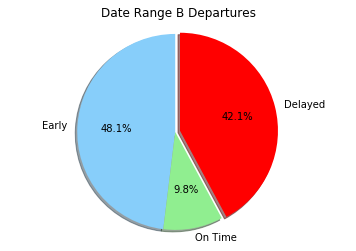

In [7]:
# Plot Date Range B Departures

Date_Range_B_Summary = [Sum_Early, Sum_On_Time, Sum_Delays]
Date_Range_B_Labels = ["Early", "On Time", "Delayed"]
colors = ["lightskyblue", "lightgreen", "red"]
explode = (0, 0, 0.05)

plt.title("Date Range B Departures")
plt.pie(Date_Range_B_Summary, autopct="%1.1f%%", explode=explode, labels=Date_Range_B_Labels, colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [8]:
# Compare total number of flights, average flights per day

# Plot average delay by hour in a random day during Date Range A
# Plot average delay by hour in a random day during Date Range B

In [9]:
df = pd.DataFrame(Date_Range_B_df)
df2 = df[df["Delay"] > 0]
df2

Counter Airport        Date  Delay
1          1     ATL  2018-12-22  257.0
3          3     ATL  2018-12-22   13.0
4          4     ATL  2018-12-22   57.0
6          6     ATL  2018-12-22   25.0
9          9     ATL  2018-12-22    1.0
10        10     ATL  2018-12-22    6.0
13        13     ATL  2018-12-22    7.0
16        16     ATL  2018-12-22   12.0
17        17     ATL  2018-12-22    5.0
19        19     ATL  2018-12-22   11.0
20        20     ATL  2018-12-22   95.0
21        21     ATL  2018-12-22   44.0
23        23     ATL  2018-12-22    2.0
24        24     ATL  2018-12-22    2.0
25        25     ATL  2018-12-22   28.0
29        29     ATL  2018-12-22    7.0
34        34     ATL  2018-12-22    3.0
36        36     ATL  2018-12-22   39.0
39        39     ATL  2018-12-22    2.0
41        41     ATL  2018-12-22   11.0
45        45     ATL  2018-12-22   16.0
46        46     ATL  2018-12-22   66.0
47        47     ATL  2018-12-22    9.0
48        48     ATL  2018-12-22   27.0
49        49     ATL  2018-12-22   41.0
50        50     ATL  2018-12-22    9.0
53        53     ATL  2018-12-22   45.0
54        54     ATL  2018-12-22   77.0
57        57     ATL  2018-12-22    3.0
60        60     ATL  2018-12-22   23.0
...      ...     ...         ...    ...
2256    2256     MCO  2019-01-23   21.0
2257    2257     MCO  2019-01-23    3.0
2258    2258     MCO  2019-01-23  143.0
2263    2263     MCO  2019-01-24  164.0
2264    2264     MCO  2019-01-24  205.0
2268    2268     MCO  2019-01-24  160.0
2270    2270     MCO  2019-01-24  156.0
2271    2271     MCO  2019-01-24   69.0
2273    2273     MCO  2019-01-24    2.0
2274    2274     MCO  2019-01-24    6.0
2276    2276     MCO  2019-01-24    7.0
2278    2278     MCO  2019-01-24   11.0
2282    2282     MCO  2019-01-24   34.0
2284    2284     MCO  2019-01-24  230.0
2286    2286     MCO  2019-01-24   26.0
2287    2287     MCO  2019-01-24   60.0
2288    2288     MCO  2019-01-25   53.0
2289    2289     MCO  2019-01-25   40.0
2290    2290     MCO  2019-01-25    5.0
2291    2291     MCO  2019-01-25   33.0
2292    2292     MCO  2019-01-25   20.0
2293    2293     MCO  2019-01-25   21.0
2295    2295     MCO  2019-01-25   36.0
2296    2296     MCO  2019-01-25   44.0
2298    2298     MCO  2019-01-25    6.0
2301    2301     MCO  2019-01-25    3.0
2308    2308     MCO  2019-01-25    1.0
2309    2309     MCO  2019-01-25   31.0
2311    2311     MCO  2019-01-25    3.0
2312    2312     MCO  2019-01-25   34.0

[974 rows x 4 columns]

In [10]:
# Create the bins in which Data will be held
# Bins are 0, 15, 30, 45, 60
bins = [0, 15, 30, 45, 60, 1000]

# Create the names for the four bins
group_names = ["0-15 minutes", "15-30 minutes", "30-45 minutes", "45-60 minutes", "60 minutes plus"]

In [11]:
df2["Delay Group"] = pd.cut(df2["Delay"], bins, labels=group_names)
df2

C:\Users\macha\Anaconda3\envs\pythondata4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Counter Airport        Date  Delay      Delay Group
1          1     ATL  2018-12-22  257.0  60 minutes plus
3          3     ATL  2018-12-22   13.0     0-15 minutes
4          4     ATL  2018-12-22   57.0    45-60 minutes
6          6     ATL  2018-12-22   25.0    15-30 minutes
9          9     ATL  2018-12-22    1.0     0-15 minutes
10        10     ATL  2018-12-22    6.0     0-15 minutes
13        13     ATL  2018-12-22    7.0     0-15 minutes
16        16     ATL  2018-12-22   12.0     0-15 minutes
17        17     ATL  2018-12-22    5.0     0-15 minutes
19        19     ATL  2018-12-22   11.0     0-15 minutes
20        20     ATL  2018-12-22   95.0  60 minutes plus
21        21     ATL  2018-12-22   44.0    30-45 minutes
23        23     ATL  2018-12-22    2.0     0-15 minutes
24        24     ATL  2018-12-22    2.0     0-15 minutes
25        25     ATL  2018-12-22   28.0    15-30 minutes
29        29     ATL  2018-12-22    7.0     0-15 minutes
34        34     ATL  2018-12-22    3.0     0-15 minutes
36        36     ATL  2018-12-22   39.0    30-45 minutes
39        39     ATL  2018-12-22    2.0     0-15 minutes
41        41     ATL  2018-12-22   11.0     0-15 minutes
45        45     ATL  2018-12-22   16.0    15-30 minutes
46        46     ATL  2018-12-22   66.0  60 minutes plus
47        47     ATL  2018-12-22    9.0     0-15 minutes
48        48     ATL  2018-12-22   27.0    15-30 minutes
49        49     ATL  2018-12-22   41.0    30-45 minutes
50        50     ATL  2018-12-22    9.0     0-15 minutes
53        53     ATL  2018-12-22   45.0    30-45 minutes
54        54     ATL  2018-12-22   77.0  60 minutes plus
57        57     ATL  2018-12-22    3.0     0-15 minutes
60        60     ATL  2018-12-22   23.0    15-30 minutes
...      ...     ...         ...    ...              ...
2256    2256     MCO  2019-01-23   21.0    15-30 minutes
2257    2257     MCO  2019-01-23    3.0     0-15 minutes
2258    2258     MCO  2019-01-23  143.0  60 minutes plus
2263    2263     MCO  2019-01-24  164.0  60 minutes plus
2264    2264     MCO  2019-01-24  205.0  60 minutes plus
2268    2268     MCO  2019-01-24  160.0  60 minutes plus
2270    2270     MCO  2019-01-24  156.0  60 minutes plus
2271    2271     MCO  2019-01-24   69.0  60 minutes plus
2273    2273     MCO  2019-01-24    2.0     0-15 minutes
2274    2274     MCO  2019-01-24    6.0     0-15 minutes
2276    2276     MCO  2019-01-24    7.0     0-15 minutes
2278    2278     MCO  2019-01-24   11.0     0-15 minutes
2282    2282     MCO  2019-01-24   34.0    30-45 minutes
2284    2284     MCO  2019-01-24  230.0  60 minutes plus
2286    2286     MCO  2019-01-24   26.0    15-30 minutes
2287    2287     MCO  2019-01-24   60.0    45-60 minutes
2288    2288     MCO  2019-01-25   53.0    45-60 minutes
2289    2289     MCO  2019-01-25   40.0    30-45 minutes
2290    2290     MCO  2019-01-25    5.0     0-15 minutes
2291    2291     MCO  2019-01-25   33.0    30-45 minutes
2292    2292     MCO  2019-01-25   20.0    15-30 minutes
2293    2293     MCO  2019-01-25   21.0    15-30 minutes
2295    2295     MCO  2019-01-25   36.0    30-45 minutes
2296    2296     MCO  2019-01-25   44.0    30-45 minutes
2298    2298     MCO  2019-01-25    6.0     0-15 minutes
2301    2301     MCO  2019-01-25    3.0     0-15 minutes
2308    2308     MCO  2019-01-25    1.0     0-15 minutes
2309    2309     MCO  2019-01-25   31.0    30-45 minutes
2311    2311     MCO  2019-01-25    3.0     0-15 minutes
2312    2312     MCO  2019-01-25   34.0    30-45 minutes

[974 rows x 5 columns]

In [13]:
# Summarize Date Range B
print(f"\nDeparture Summary for Date Range B\n")

Sum_1 = (df2['Delay Group'] == "0-15 minutes").sum()
print(f"Total 0-15: {Sum_1}")

Sum_2 = (df2['Delay Group'] == "15-30 minutes").sum()
print(f"Total 15-30: {Sum_2}")

Sum_3 = (df2['Delay Group'] == "30-45 minutes").sum()
print(f"Total 30-45: {Sum_3}")

Sum_4 = (df2['Delay Group'] == "45-60 minutes").sum()
print(f"Total 45-60: {Sum_4}")

Sum_5 = (df2['Delay Group'] == "60 minutes plus").sum()
print(f"Total 60+: {Sum_5}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


df2_Summary_data = {"0-15 minutes": [Sum_1], "15-30 minutes": [Sum_2], "30-45 minutes": [Sum_3], "45-60 minutes": [Sum_4], 
                    "60+ minutes": [Sum_5]}
df2_Summary_table = pd.DataFrame(df2_Summary_data)

df2_Summary_table.head()


Departure Summary for Date Range B

Total 0-15: 528
Total 15-30: 164
Total 30-45: 104
Total 45-60: 51
Total 60+: 127
Total Departures: 2312



0-15 minutes  15-30 minutes  30-45 minutes  45-60 minutes  60+ minutes
0           528            164            104             51          127